<a href="https://colab.research.google.com/github/hahajjjun/Scientific-Visualization-Python-Matplotlib/blob/main/Chapter%201_Anatomy_of_Figure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Basic 

In [1]:
import scipy
import numpy
import matplotlib.pyplot as plt

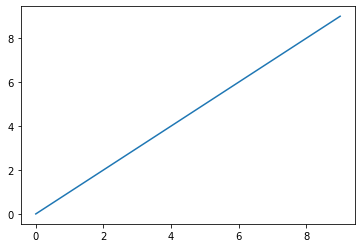

In [2]:
#implicit way
plt.plot(range(10))
plt.show()

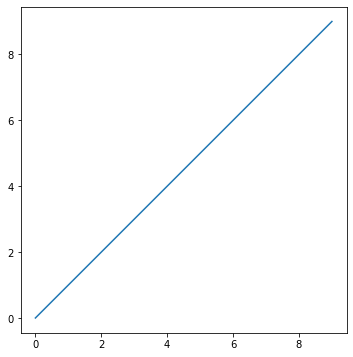

In [3]:
#explicit way
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(aspect = 1) #aspect=1 means x,y scale are equal
ax.plot(range(10))
plt.show()

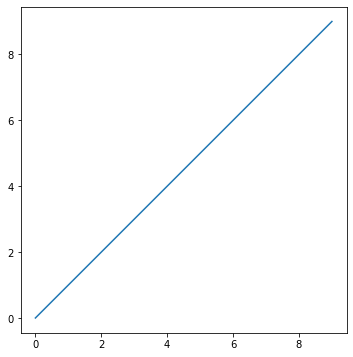

In [4]:
fig, ax = plt.subplots(figsize = (6,6), subplot_kw = {"aspect" : 1})
ax.plot(range(10))
# subplot_kw : Dictionary with keywords passed to the "add_subplot" call used to create each subplot.

# 1.1 Anatomy of Figure

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

## 1.1.1 Ticker

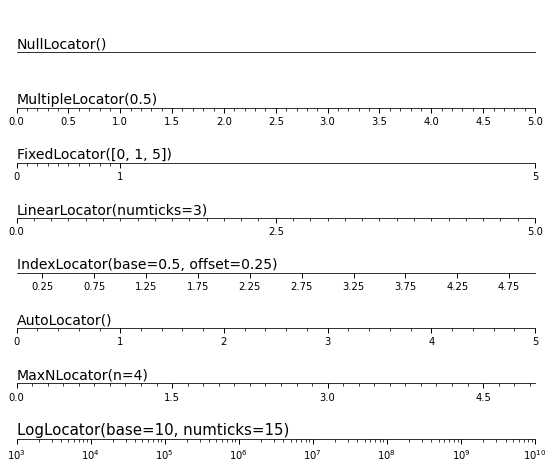

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)


plt.figure(figsize=(8, 6))
n = 8

# Null Locator
ax = plt.subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.text(0.0, 0.1, "NullLocator()", fontsize=14, transform=ax.transAxes)

# Multiple Locator
ax = plt.subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.text(0.0, 0.1, "MultipleLocator(0.5)", fontsize=14,
        transform=ax.transAxes)

# Fixed Locator
ax = plt.subplot(n, 1, 3)
setup(ax)
majors = [0, 1, 5]
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.linspace(0, 1, 11)[1:-1]
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.text(0.0, 0.1, "FixedLocator([0, 1, 5])", fontsize=14,
        transform=ax.transAxes)

# Linear Locator
ax = plt.subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.LinearLocator(3))
ax.xaxis.set_minor_locator(ticker.LinearLocator(31))
ax.text(0.0, 0.1, "LinearLocator(numticks=3)",
        fontsize=14, transform=ax.transAxes)

# Index Locator
ax = plt.subplot(n, 1, 5)
setup(ax)
ax.plot(range(0, 5), [0]*5, color='white')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=.5, offset=.25))
ax.text(0.0, 0.1, "IndexLocator(base=0.5, offset=0.25)",
        fontsize=14, transform=ax.transAxes)

# Auto Locator
ax = plt.subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.text(0.0, 0.1, "AutoLocator()", fontsize=14, transform=ax.transAxes)

# MaxN Locator
ax = plt.subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(40))
ax.text(0.0, 0.1, "MaxNLocator(n=4)", fontsize=14, transform=ax.transAxes)

# Log Locator
ax = plt.subplot(n, 1, 8)
setup(ax)
ax.set_xlim(10**3, 10**10)
ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.text(0.0, 0.1, "LogLocator(base=10, numticks=15)",
        fontsize=15, transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)
plt.savefig("TickLocator.pdf")
plt.show()

## 1.1.2 Anatomy of Figures

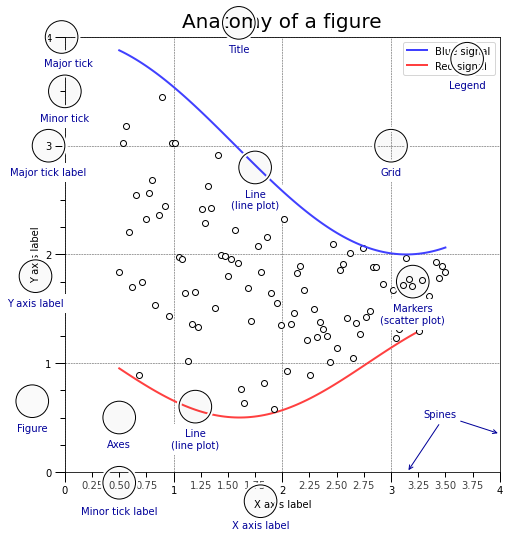

In [8]:
np.random.seed(123)

# 데이터 마련
X = np.linspace(0.5, 3.5, 100) # 시작-끝 등간격으로 N개 값을 가지는 array 반환
Y1 = 3+ np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X)) # Y1과 Y2 사이에서 임의의 값 uniform하게 추출, 총 len(X) = 100개

# Figure 골격 설정
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1) # (1,1,1) = 111, n_rows, n_cols, index 순서대로

# 실제 Plotting
ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0, marker="o", markerfacecolor="w", markeredgecolor="k")

# Tick Locating
ax.xaxis.set_major_locator(MultipleLocator(1.000)) #x축을 1.000 단위로 Major Tick을 만든다.
ax.xaxis.set_minor_locator(AutoMinorLocator(4)) #x축의 Minor Tick은 하나의 Major Tick당 4개로 한다.
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

# Custom Tick 추가하기
def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick)) # minor_tick에 대해서 값을 보여주는 Custom Tick

# x,y축 길이 고정
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

# Tick마다 서식 설정
ax.tick_params(which="major", width=1.0)
ax.tick_params(which="major", length=10)
ax.tick_params(which="minor", width=1.0, labelsize=10)
ax.tick_params(which="minor", length=5, labelsize=10, labelcolor="0.25")

# 그리드 그리기
ax.grid(linestyle="--", linewidth=0.5, color=".25", zorder=-10)

# 제목, 레이블 붙이기
ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment="bottom")
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")
ax.legend()

# 원 그리기
def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke

    circle = Circle(
        (x, y),
        radius,
        clip_on=False,  # When False artists will be visible outside of the axes which can lead to unexpected results.
        zorder=10,
        linewidth=1,
        edgecolor="black",
        facecolor=(0, 0, 0, 0.0125),
        path_effects=[withStroke(linewidth=5, foreground="w")],
    )
    ax.add_artist(circle)

# 텍스트 추가하기
def text(x, y, text):
    ax.text(
        x,
        y,
        text,
        backgroundcolor="white",
        # fontname="Yanone Kaffeesatz", fontsize="large",
        ha="center",
        va="top",
        weight="regular",
        color="#000099",
    )

# 원/텍스트 그리기
# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

# 화살표 그리기
color = "#000099"
ax.annotate(
    "Spines",
    xy=(4.0, 0.35),
    xytext=(3.3, 0.5),
    color=color,
    weight="regular",  # fontsize="large", fontname="Yanone Kaffeesatz",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
)

ax.annotate(
    "",
    xy=(3.15, 0.0),
    xytext=(3.45, 0.45),
    color=color,
    weight="regular",  # fontsize="large", fontname="Yanone Kaffeesatz",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
)

plt.show()

## 1.1.3 Graphic Primitives

Axis Ticklabel Customizing

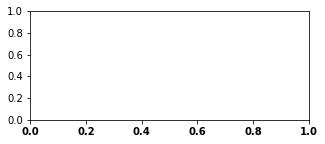

In [9]:
fig, ax = plt.subplots(figsize = (5,2))
for label in ax.get_xaxis().get_ticklabels():
  label.set_fontweight("bold") 
# a numeric value in range 0-1000, 'ultralight', 'light', 'normal', 
# 'regular', 'book', 'medium', 'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'
plt.show()

zorder property

In [10]:
# zorder property는 위/아래로 보내는 순서를 결정한다.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.patches import Rectangle, PathPatch

In [11]:
def text3d(ax, xyz, s, zdir="z", size=None, angle=0, **kwargs):
    x, y, z = xyz
    if zdir == "y":
        x, y, z = x, z, y
    elif zdir == "x":
        x, y, z = y, z, x
    else:
        x, y, z = x, y, z
    text_path = TextPath((0, 0), s, size=size)
    trans = Affine2D().rotate(angle).translate(x, y)
    p = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=z, zdir=zdir)

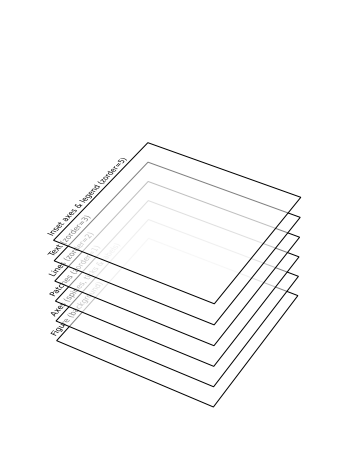

In [17]:
fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111, projection="3d", xticks=[], yticks=[], zticks=[])
ax.set_axis_off() # 축 안 보이게 하기
ax.set_xlim(0, 10), ax.set_ylim(0, 10), ax.set_zlim(0, 10)
for i, text in enumerate(
    [
        "Figure (background)",
        "Axes (spines, ticks & labels)",
        "Patches (zorder=1)",
        "Lines (zorder=2)",
        "Text (zorder=3)",
        "Inset axes & legend (zorder=5)",
    ]
): #넣어줄 텍스트를 enumerate함 : i = 0, text = Figure (background) 식으로

  # 흰색 직사각형을 투명도 0.5로 그림
  p = Rectangle((0, 0), 10, 10, edgecolor="None", facecolor="white", alpha=0.5) 
  ax.add_patch(p)
  art3d.pathpatch_2d_to_3d(p, z=i, zdir="z") # 2차원 직사각형을 3차원으로 바꿀 때 : z값을 다르게 해서 변환, z축 방향으로 align하기(zdir="x"로 바꾸면 x축으로 align)

  # 테두리는 투명도가 0.5가 되면 안 되므로 따로 투명한 직사각형을 따로 그림
  p = Rectangle((0, 0), 10, 10, edgecolor="black", facecolor="None")
  ax.add_patch(p)
  art3d.pathpatch_2d_to_3d(p, z=i, zdir="z")

  # 3차원 텍스트 추가하기
  text3d(
        ax,
        (-0.25, 0.25, i),
        text,
        zdir="z",
        size=0.5,
        angle=np.pi / 2,
        ec="none",
        fc="k",
    )
plt.savefig("zorder.pdf")
plt.show()

Concepts : 화질, 해상도 등등...

## 1.4 Exercises

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [1]:
# Make Random Curves
def curve():
    n = np.random.randint(1, 5) # 몇 개의 center point 찍을지 결정
    centers = np.random.normal(0.0, 1.0, n) # center point n개를 0~1 사이에 찍음
    widths = np.random.uniform(5.0, 50.0, n) # width는 5~50 사이로 설정
    widths = 10 * widths / widths.sum()
    scales = np.random.uniform(0.1, 1.0, n)
    scales /= scales.sum()
    X = np.zeros(500)
    x = np.linspace(-3, 3, len(X))
    for center, width, scale in zip(centers, widths, scales):
        X = X + scale * np.exp(-(x - center) * (x - center) * width)
    return X

In [6]:
np.random.seed(123)
cmap = mpl.cm.get_cmap("Spectral") # colormap function
fig = plt.figure(figsize=(8, 8))
ax = None

<Figure size 576x576 with 0 Axes>

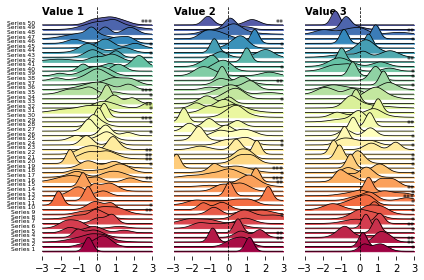

In [20]:
for n in range(3):
    ax = plt.subplot(1, 3, n + 1, frameon=False, sharex=ax)
    for i in range(50):
        Y = curve()
        X = np.linspace(-3, 3, len(Y))
        ax.plot(X, 3 * Y + i, color="k", linewidth=0.75, zorder=100 - i)
        color = cmap(i / 50)
        ax.fill_between(X, 3 * Y + i, i, color=color, zorder=100 - i)
        
        # Some random text on the right of the curve
        v = np.random.uniform(0, 1)
        if v < 0.4:
            text = "*"
            if v < 0.05:
                text = "***"
            elif v < 0.2:
                text = "**"
            ax.text(
                3.0,
                i,
                text,
                ha="right",
                va="baseline",
                size=8,
                transform=ax.transData,
                zorder=300,
            )
    
    # x, y axis setting
    ax.yaxis.set_tick_params(tick1On=False)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-1, 53)
    ax.axvline(0.0, ls="--", lw=0.75, color="black", zorder=250)
    ax.text(
        0.0,
        1.0,
        "Value %d" % (n + 1),
        ha="left",
        va="top",
        weight="bold",
        transform=ax.transAxes,
    )

    # 1st column figure : set y ticklable
    if n == 0:
        ax.yaxis.set_tick_params(labelleft=True)
        ax.set_yticks(np.arange(50))
        ax.set_yticklabels(["Series %d" % i for i in range(1, 51)])
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(6)
            tick.label.set_verticalalignment("bottom")
    else:
        ax.yaxis.set_tick_params(labelleft=False)

plt.tight_layout()
plt.savefig("zorder-plots.pdf")
plt.show()

Debugging : Visualization of Curve() Code

How many points: 4
center: -0.04510291321630641 width: 1.5401254256368195 scale: 0.31556441494759885
center: -1.2246863107371027 width: 1.4400170288764658 scale: 0.2976616262627092
center: 1.334004645383887 width: 4.473180833850451 scale: 0.2052036128226612
center: 1.2739332282121438 width: 2.5466767116362643 scale: 0.18157034596703076


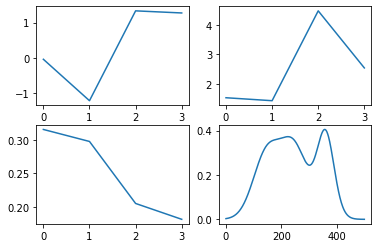

In [3]:
n = np.random.randint(1, 5) # 몇 개의 center point 찍을지 결정
centers = np.random.normal(0.0, 1.0, n) # center point n개를 -0.5~0.5 사이에 찍음, normal distribution
widths = np.random.uniform(5.0, 50.0, n) # width는 5~50 사이로 설정, uniform distribution
widths = 10* widths / widths.sum() # rescale
scales = np.random.uniform(0.1, 1.0, n)
scales /= scales.sum()
X = np.zeros(500)
x = np.linspace(-3, 3, len(X))

print("How many points:", n)

for center, width, scale in zip(centers, widths, scales):
  print("center:",center,"width:",width,"scale:",scale)
  X = X+scale * np.exp(-(x-center)*(x-center)*width) # X 중심 정규분포 여러 개를 더한 형태로 자연스러운 curve를 만듦.

fig, ax = plt.subplots(2,2)
ax[0][0].plot(centers)
ax[0][1].plot(widths)
ax[1][0].plot(scales)
ax[1][1].plot(X)

Debugging : Visualization of subplotting code

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future versi

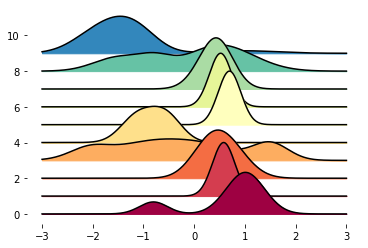

In [16]:
for i in range(10):
  ax = plt.subplot(1,1,1,frameon = False)
  Y = curve()
  X = np.linspace(-3, 3, len(Y))
  ax.plot(X, 3*Y+i, color = "k", zorder = 20-i)
  color = cmap(i/10)
  ax.fill_between(X, 3*Y+i, i, color = color, zorder = 20-i) # 1 step up for i iteration